   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

C:\Users\Dell\AppData\Local\Temp\ipykernel_16776\2652457179.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16776\2652457179.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F


Logistic Regression Model Evaluation:
Accuracy: 0.8156424581005587
Confusion Matrix:
 [[89 16]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Random Forest Model Evaluation:
Accuracy: 0.7988826815642458
Confusion Matrix:
 [[86 19]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       105
           1       0.75      0.77      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Gradient Boosting Model Evaluation:
Accuracy: 0.6759776536312849
Confusion Matrix:
 [[61 44

e:\Anaconda\envs\Bilal-2.0\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
e:\Anaconda\envs\Bilal-2.0\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


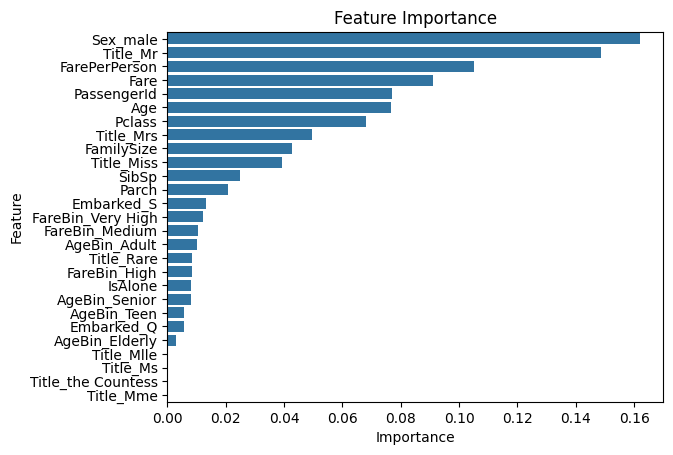

Submission file saved as 'Submission.csv'


C:\Users\Dell\AppData\Local\Temp\ipykernel_16776\2652457179.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16776\2652457179.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Data
def load_data(filepath):
    return pd.read_csv(filepath)

# Explore Data
def explore_data(data):
    print(data.head())
    print(data.info())
    print(data.describe())

# Clean and Engineer Features
def clean_data(data, is_train=True, train_columns=None):
    # Fill missing values
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data['Fare'].fillna(data['Fare'].median(), inplace=True)
    
    # Feature Engineering
    data['FamilySize'] = data['SibSp'] + data['Parch']
    data['IsAlone'] = (data['FamilySize'] == 0).astype(int)
    data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
    rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Sir', 'Capt', 'Countess', 'Jonkheer', 'Don']
    data['Title'] = data['Title'].apply(lambda x: 'Rare' if x in rare_titles else x)
    
    # Age and Fare Binning
    data['AgeBin'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, np.inf], labels=['Child', 'Teen', 'Adult', 'Senior', 'Elderly'])
    data['FarePerPerson'] = data['Fare'] / (data['FamilySize'] + 1)
    data['FareBin'] = pd.qcut(data['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
    
    # Drop unnecessary columns
    data.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)
    data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'AgeBin', 'FareBin', 'Title'], drop_first=True)
    
    if not is_train:
        # Align test data columns to train data
        for col in train_columns:
            if col not in data:
                data[col] = 0
        data = data[train_columns]  # Ensure same order
    
    return data

# Feature Importance
def plot_feature_importance(model, features):
    feature_importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
    sns.barplot(x='Importance', y='Feature', data=feature_importances)
    plt.title('Feature Importance')
    plt.show()

# Train Models
def train_models(X_train, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Logistic Regression
    log_model = LogisticRegression(solver='liblinear')
    log_model.fit(X_train_scaled, y_train)
    
    # Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Gradient Boosting
    gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gb_model.fit(X_train, y_train)
    
    return log_model, rf_model, gb_model, scaler

# Evaluate Models
def evaluate_model(model, scaler, X_test, y_test, model_name):
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)
    
    print(f"\n{model_name} Model Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    return y_pred

# Main Function
def main():
    train_filepath = r'D:/Internship/Task_1/Titanic classification/train.csv'
    test_filepath = r'D:/Internship/Task_1/Titanic classification/test.csv'
    
    # Load and clean train data
    train_data = load_data(train_filepath)
    explore_data(train_data)
    train_data_cleaned = clean_data(train_data)
    # Save train columns for alignment
    train_columns = train_data_cleaned.drop(columns='Survived').columns
    
    # Separate features and target
    X = train_data_cleaned.drop(columns='Survived')
    y = train_data_cleaned['Survived']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train models
    log_model, rf_model, gb_model, scaler = train_models(X_train, y_train)
    
    # Evaluate models
    evaluate_model(log_model, scaler, X_test, y_test, "Logistic Regression")
    evaluate_model(rf_model, scaler, X_test, y_test, "Random Forest")
    evaluate_model(gb_model, scaler, X_test, y_test, "Gradient Boosting")
    
    # Plot feature importance for Random Forest
    plot_feature_importance(rf_model, X.columns)
    
    # Load and clean test data
    test_data = load_data(test_filepath)
    test_data_cleaned = clean_data(test_data, is_train=False, train_columns=train_columns)
    test_passenger_ids = test_data['PassengerId']
    
    # Predict on test data
    test_predictions = rf_model.predict(test_data_cleaned)
    
    # Save submission
    submission = pd.DataFrame({
        'PassengerId': test_passenger_ids,
        'Survived': test_predictions
    })
    submission.to_csv('submission.csv', index=False)
    print("Submission file saved as 'Submission.csv'")

if __name__ == "__main__":
    main()


In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.
